In [50]:
import pandas as pd
data = pd.read_csv("phase2_results/old.csv")
print(data)

   instance  bks   nbh  time      seed  makespan
0      X6_8  147  swap     2   8948803       173
1      X6_8  147  swap     2   9459607       170
2      X6_8  147  swap     2  40594335       174
3      X6_8  147  swap     2  41299189       166
4      X6_8  147  swap     2  55911072       174
5      X6_8  147  swap     2  59528639       176
6      X6_8  147  swap     2  61045676       171
7      X6_8  147  swap     2  81907177       172
8      X6_8  147  swap     2  84183543       174
9      X6_8  147  swap     2  85838798       168
10     X9_6   98  swap     2   8948803       103
11     X9_6   98  swap     2   9459607       102
12     X9_6   98  swap     2  40594335       105
13     X9_6   98  swap     2  41299189       104
14     X9_6   98  swap     2  55911072       104
15     X9_6   98  swap     2  59528639       104
16     X9_6   98  swap     2  61045676       103
17     X9_6   98  swap     2  81907177       104
18     X9_6   98  swap     2  84183543       103
19     X9_6   98  sw

[Text(0, 0, 'X6_8'),
 Text(1, 0, 'X9_6'),
 Text(2, 0, 'X10_9'),
 Text(3, 0, 'X27_6'),
 Text(4, 0, 'X30_8'),
 Text(5, 0, 'X42_7'),
 Text(6, 0, 'X51_6'),
 Text(7, 0, 'X55_10'),
 Text(8, 0, 'X58_3'),
 Text(9, 0, 'X59_3')]

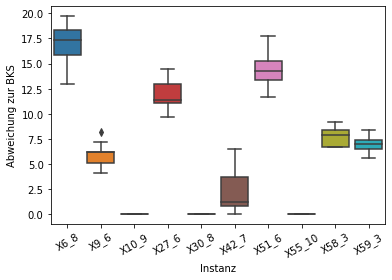

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

sns.boxplot(ax=ax, x=data.instance,  y=(data.makespan/data.bks - 1) * 100)

ax.set(xlabel="Instanz", ylabel="Abweichung zur BKS")
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)



In [48]:
pd.set_option("display.max_rows", None)
print(data)


instance,bks,nbh,time,seed,makespan
X6_8,147,swap,2,8948803,173
X6_8,147,swap,2,9459607,170
X6_8,147,swap,2,40594335,174
X6_8,147,swap,2,41299189,166
X6_8,147,swap,2,55911072,174
X6_8,147,swap,2,59528639,176
X6_8,147,swap,2,61045676,171
X6_8,147,swap,2,81907177,172
X6_8,147,swap,2,84183543,174
X6_8,147,swap,2,85838798,168
X9_6,98,swap,2,8948803,103
X9_6,98,swap,2,9459607,102
X9_6,98,swap,2,40594335,105
X9_6,98,swap,2,41299189,104
X9_6,98,swap,2,55911072,104
X9_6,98,swap,2,59528639,104
X9_6,98,swap,2,61045676,103
X9_6,98,swap,2,81907177,104
X9_6,98,swap,2,84183543,103
X9_6,98,swap,2,85838798,106
X10_9,77,swap,2,8948803,77
X10_9,77,swap,2,9459607,77
X10_9,77,swap,2,40594335,77
X10_9,77,swap,2,41299189,77
X10_9,77,swap,2,55911072,77
X10_9,77,swap,2,59528639,77
X10_9,77,swap,2,61045676,77
X10_9,77,swap,2,81907177,77
X10_9,77,swap,2,84183543,77
X10_9,77,swap,2,85838798,77
X27_6,145,swap,2,8948803,161
X27_6,145,swap,2,9459607,166
X27_6,145,swap,2,40594335,161
X27_6,145,swap,2,41299189,164
X27_6,145,swap,2,55911072,166
X27_6,145,swap,2,59528639,159
X27_6,145,swap,2,61045676,162
X27_6,145,swap,2,81907177,163
X27_6,145,swap,2,84183543,161
X27_6,145,swap,2,85838798,161
X30_8,79,swap,2,8948803,79
X30_8,79,swap,2,9459607,79
X30_8,79,swap,2,40594335,79
X30_8,79,swap,2,41299189,79
X30_8,79,swap,2,55911072,79
X30_8,79,swap,2,59528639,79
X30_8,79,swap,2,61045676,79
X30_8,79,swap,2,81907177,79
X30_8,79,swap,2,84183543,79
X30_8,79,swap,2,85838798,79
X42_7,123,swap,2,8948803,126
X42_7,123,swap,2,9459607,131
X42_7,123,swap,2,40594335,124
X42_7,123,swap,2,41299189,125
X42_7,123,swap,2,55911072,128
X42_7,123,swap,2,59528639,124
X42_7,123,swap,2,61045676,124
X42_7,123,swap,2,81907177,124
X42_7,123,swap,2,84183543,130
X42_7,123,swap,2,85838798,123
X51_6,214,swap,2,8948803,245
X51_6,214,swap,2,9459607,246
X51_6,214,swap,2,40594335,247
X51_6,214,swap,2,41299189,249
X51_6,214,swap,2,55911072,244
X51_6,214,swap,2,59528639,239
X51_6,214,swap,2,61045676,244
X51_6,214,swap,2,81907177,252
X51_6,214,swap,2,84183543,241
X51_6,214,swap,2,85838798,242
X55_10,100,swap,2,8948803,100
X55_10,100,swap,2,9459607,100
X55_10,100,swap,2,40594335,100
X55_10,100,swap,2,41299189,100
X55_10,100,swap,2,55911072,100
X55_10,100,swap,2,59528639,100
X55_10,100,swap,2,61045676,100
X55_10,100,swap,2,81907177,100
X55_10,100,swap,2,84183543,100
X55_10,100,swap,2,85838798,100
X58_3,120,swap,2,8948803,130
X58_3,120,swap,2,9459607,128
X58_3,120,swap,2,40594335,130
X58_3,120,swap,2,41299189,130
X58_3,120,swap,2,55911072,130
X58_3,120,swap,2,59528639,128
X58_3,120,swap,2,61045676,128
X58_3,120,swap,2,81907177,131
X58_3,120,swap,2,84183543,128
X58_3,120,swap,2,85838798,129
X59_3,108,swap,2,8948803,116
X59_3,108,swap,2,9459607,117
X59_3,108,swap,2,40594335,115
X59_3,108,swap,2,41299189,116
X59_3,108,swap,2,55911072,115
X59_3,108,swap,2,59528639,116
X59_3,108,swap,2,61045676,114
X59_3,108,swap,2,81907177,114
X59_3,108,swap,2,84183543,115
X59_3,108,swap,2,85838798,116



   instance  bks   nbh  time      seed  makespan
0      X6_8  147  swap     2   8948803       173
1      X6_8  147  swap     2   9459607       170
2      X6_8  147  swap     2  40594335       174
3      X6_8  147  swap     2  41299189       166
4      X6_8  147  swap     2  55911072       174
5      X6_8  147  swap     2  59528639       176
6      X6_8  147  swap     2  61045676       171
7      X6_8  147  swap     2  81907177       172
8      X6_8  147  swap     2  84183543       174
9      X6_8  147  swap     2  85838798       168
10     X9_6   98  swap     2   8948803       103
11     X9_6   98  swap     2   9459607       102
12     X9_6   98  swap     2  40594335       105
13     X9_6   98  swap     2  41299189       104
14     X9_6   98  swap     2  55911072       104
15     X9_6   98  swap     2  59528639       104
16     X9_6   98  swap     2  61045676       103
17     X9_6   98  swap     2  81907177       104
18     X9_6   98  swap     2  84183543       103
19     X9_6   98  sw